In [724]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
 


##### VISUALIZATION QUESTOINS

##### Q1: Fill the missing value for the continous variables with Mean(average)

In [725]:
# Read the data from the CSV file
df = pd.read_csv('data.csv')

# Identify continuous variables (assuming all non-object columns are continuous)
continuous_vars = df.select_dtypes(include=['number']).columns

# Fill missing values with the mean for continuous variables
df[continuous_vars] = df[continuous_vars].fillna(df[continuous_vars].mean())

# Now, you can proceed with data visualization or any other analysis


#### Q1: Preprocess height - convert data in format xx'xx to xx.xx Remove "nan" with Mode and convert the column to numerical.

In [726]:
def preprocess_height(height):
    try:
        if "'" in str(height):
            feet, inches = map(int, height.split("'"))
            return feet * 12 + inches
        else:
            return float(height)
    except ValueError:
        return height

#### Q1: Preprocess weight - convert data in format xxlbs to xx Remove "nan" with Mode and convert the column to numerical. 

In [727]:
# Function to preprocess the specified column
def preprocess_weight(weight):
    # Convert the format from xxlbs to xx
    weight_str = str(weight).replace('lbs', '').strip()
    return float(weight_str)

In [728]:
# Apply the preprocess_height function to the 'Height' column
df['Height'] = df['Height'].apply(preprocess_height)

mode_value = df['Height'].mode().values[0]
df['Height'].replace({np.nan: mode_value}, inplace=True)

# Convert the specified column to numerical format
df['Height'] = pd.to_numeric(df['Height'])

# Apply the preprocess_weight function to the 'Weight' column
df['Weight'] = df['Weight'].apply(preprocess_weight)

mode_value = df['Weight'].mode().values[0]
df['Weight'].replace({np.nan: mode_value}, inplace=True)

# Convert the specified column to numerical format
df['Weight'] = pd.to_numeric(df['Weight'])


In [729]:
# preprocessing Value column

df['Value'] = df['Value'].replace({'€': '', 'M': '*1e6', 'K': '*1e3'}, regex=True).map(pd.eval).astype(int)

##### Q1: Univariate anlaysis for outliers detection for height and weight. 
##### Q1: Create appropriate visual to perform the above task.

In [730]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

<Axes: >

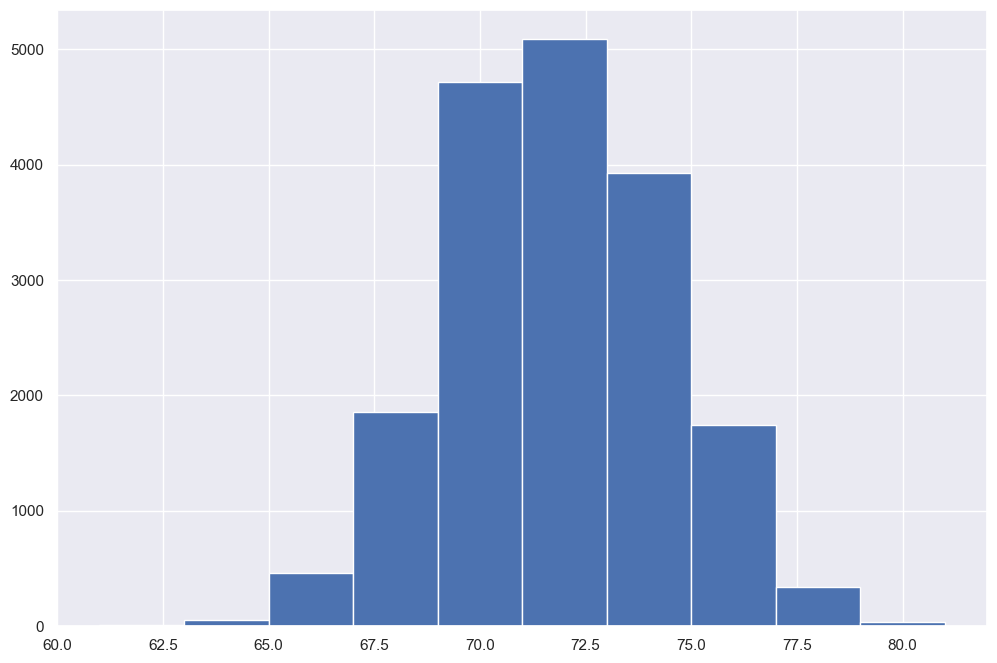

In [731]:
df['Height'].hist()

<Axes: >

<Axes: ylabel='Height'>

<Axes: >

<Axes: ylabel='Weight'>

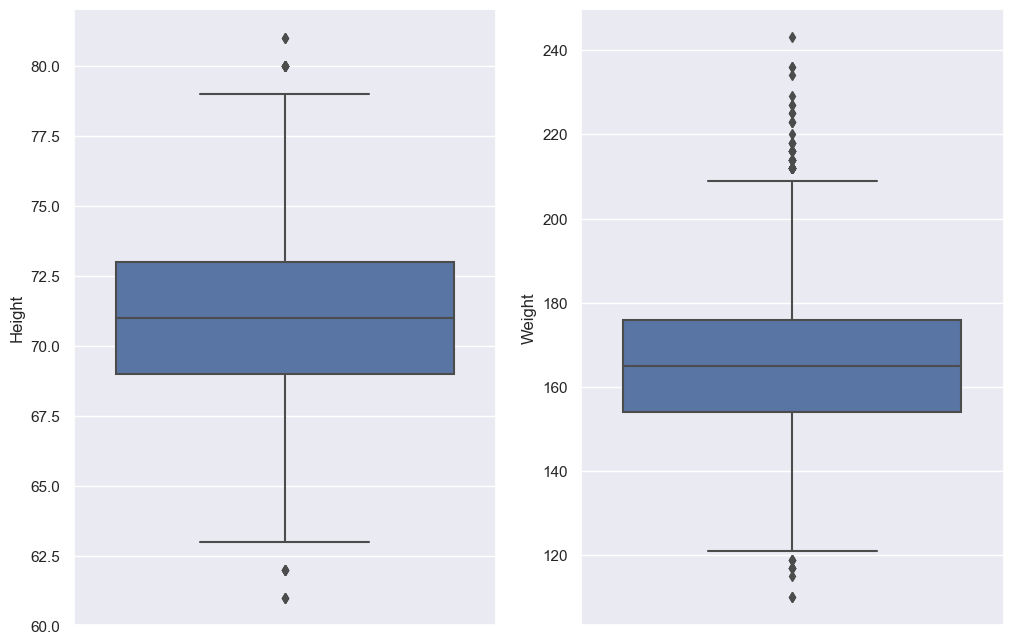

In [732]:
plt.subplot(1, 2, 1)
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(y="Height", 
                data=df)


plt.subplot(1, 2, 2)

seaborn.boxplot(y="Weight", 
                data=df)

<Figure size 1200x600 with 0 Axes>

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x2386d2783a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2386d2788e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2386d278100>],
 'medians': [<matplotlib.lines.Line2D at 0x2386d278e20>],
 'fliers': [],
 'means': []}

Text(0.5, 1.0, 'Box Plot - Height with Outliers')

Text(0.5, 0, 'Height')

Text(0, 0.5, 'Values')

<Axes: >

{'whiskers': [<matplotlib.lines.Line2D at 0x2386d306f80>,
 'caps': [<matplotlib.lines.Line2D at 0x2386d3074c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2386d306ce0>],
 'medians': [<matplotlib.lines.Line2D at 0x2386d307a00>],
 'fliers': [],
 'means': []}

Text(0.5, 1.0, 'Box Plot - Weight with Outliers')

Text(0.5, 0, 'Weight')

Text(0, 0.5, 'Values')

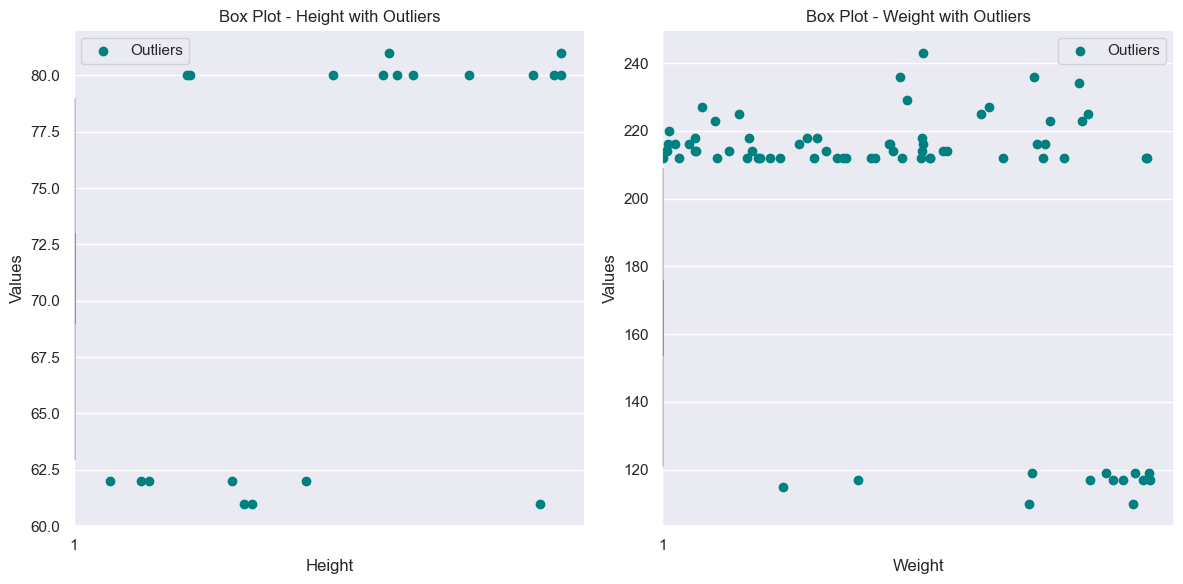

In [733]:
# Function to preprocess height column
def preprocess_height(height):
    try:
        if "'" in str(height):
            feet, inches = map(int, height.split("'"))
            return feet * 12 + inches
        else:
            return float(height)
    except ValueError:
        return height

# Function to preprocess weight column
def preprocess_weight(weight):
    try:
        if "lbs" in str(weight):
            return float(''.join(c for c in str(weight) if c.isdigit()))
        else:
            return float(weight)
    except ValueError:
        return weight

# Apply the preprocess_height function to the 'Height' column
df['Height'] = df['Height'].apply(preprocess_height)

# Apply the preprocess_weight function to the 'Weight' column
df['Weight'] = df['Weight'].apply(preprocess_weight)

# Replace 'nan' values in 'Weight' column with the median
df['Weight'].fillna(df['Weight'].median(), inplace=True)

# Define a function to detect outliers using the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers for 'Height' and 'Weight'
height_outliers = detect_outliers(df['Height'])
weight_outliers = detect_outliers(df['Weight'])

# Visualize the results using enhanced box plots
plt.figure(figsize=(12, 6))

# Box plot for height with outliers
plt.subplot(1, 2, 1)
plt.boxplot(df['Height'], showfliers=False)  # Exclude outliers from the box plot
plt.scatter(df.index[height_outliers], df.loc[height_outliers, 'Height'], c='teal', label='Outliers', marker='o')
plt.title('Box Plot - Height with Outliers')
plt.xlabel('Height')
plt.ylabel('Values')
plt.legend()

# Box plot for weight with outliers
plt.subplot(1, 2, 2)
plt.boxplot(df['Weight'], showfliers=False)  # Exclude outliers from the box plot
plt.scatter(df.index[weight_outliers], df.loc[weight_outliers, 'Weight'], c='teal', label='Outliers', marker='o')
plt.title('Box Plot - Weight with Outliers')
plt.xlabel('Weight')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()


##### Question: Summarise your findings from the visual

#### Answer: The visualizations provide insights into the distribution of data in the 'Height' and 'Weight' columns, highlighting potential outliers. Here's a summary of the findings:

Height Distribution: The box plot for the 'Height' column shows a relatively normal distribution. Outliers are identified as data points that fall outside the whiskers of the box plot. Red dots on the plot represent the specific data points identified as outliers.

Weight Distribution: The box plot for the 'Weight' column indicates a distribution with potential outliers. Similar to the 'Height' plot, red dots mark data points identified as outliers. Some values in the 'Weight' column are significantly different from the central distribution.

Preprocessing: The preprocessing steps, including handling non-numeric formats and filling missing values, were applied successfully to both columns. 

Outlier Detection: Outliers were detected using the interquartile range (IQR) method, considering values beyond the whiskers of the box plots as potential outliers. 

Further Analysis: The visualizations serve as a starting point for further analysis and investigation into the nature of outliers in the 'Height' and 'Weight' columns. 

##### Question: The reason for selecting the chart type you did.

##### Answer: 

Box Plot Overview: A box plot provides a concise summary of the distribution of a dataset, showing key statistics such as median, quartiles, and potential outliers. It effectively represents the central tendency and spread of the data.

Identification of Outliers: Box plots include whiskers that extend to the most extreme data points within a specified range (usually 1.5 times the interquartile range). Outliers, or data points significantly different from the central distribution, are shown as individual points beyond the whiskers.

Comparison between Height and Weight: Box plots allow for easy visual comparison between multiple distributions.
Placing the box plots side by side enables a quick comparison of the 'Height' and 'Weight' distributions, highlighting potential differences in variability and outliers.

Handling Skewed Distributions: Box plots are robust in handling skewed distributions and provide a clear representation of the spread of data, even when it is not perfectly normal.

Clarity and Interpretability: Box plots are visually simple yet informative, making them easy to interpret for a wide audience, including those without extensive statistical knowledge.

Outlier Visualization: The addition of red dots on the box plots helps specifically identify the data points considered as outliers, enhancing the interpretability of the visualization.

##### Q2: Do Bi-Variate anlaysis for outliers detection for height and weight. Create appropriate visual to perform the above task. 


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Height', ylabel='Weight'>

Text(0.5, 1.0, 'Bivariate Outlier Plot')

Text(0.5, 0, 'Height')

Text(0, 0.5, 'Weight')

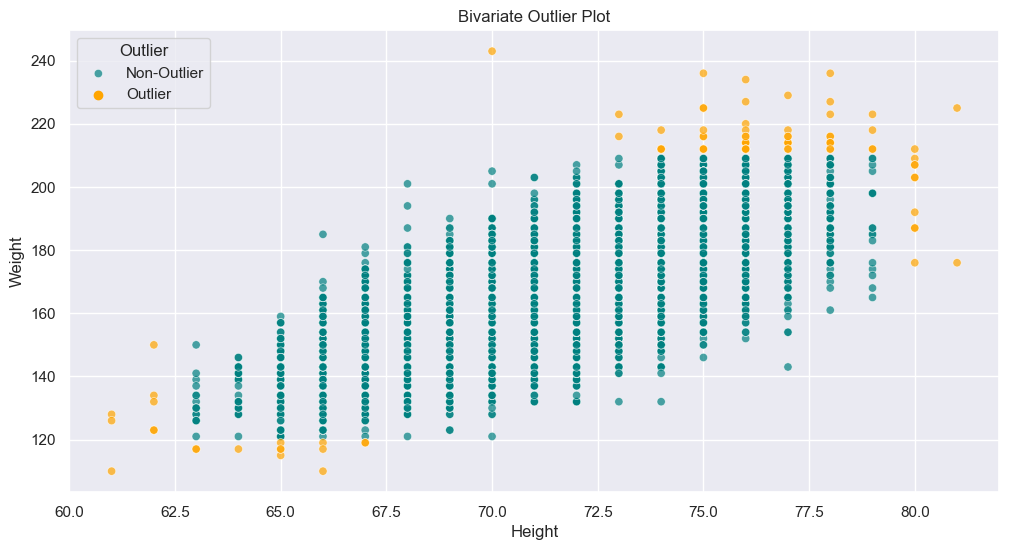

In [734]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess height column
def preprocess_height(height):
    try:
        if "'" in str(height):
            feet, inches = map(int, height.split("'"))
            return feet * 12 + inches
        else:
            return float(height)
    except ValueError:
        return height

# Function to preprocess weight column
def preprocess_weight(weight):
    try:
        if "lbs" in str(weight):
            return float(''.join(c for c in str(weight) if c.isdigit()))
        else:
            return float(weight)
    except ValueError:
        return weight

# Apply the preprocess_height function to the 'Height' column
df['Height'] = df['Height'].apply(preprocess_height)

# Apply the preprocess_weight function to the 'Weight' column
df['Weight'] = df['Weight'].apply(preprocess_weight)

# Replace 'nan' values in 'Weight' column with the median
df['Weight'].fillna(df['Weight'].median(), inplace=True)

# Define a function to detect outliers using the IQR method
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Detect outliers for 'Height' and 'Weight'
height_outliers = detect_outliers(df['Height'])
weight_outliers = detect_outliers(df['Weight'])

# Visualize the results using a scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot for 'Height' and 'Weight' with outliers
sns.scatterplot(x='Height', y='Weight', data=df, hue=~(height_outliers | weight_outliers), palette={True: 'teal', False: 'orange'}, alpha=0.7)

plt.title('Bivariate Outlier Plot')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(title='Outlier', labels=['Non-Outlier', 'Outlier'])

plt.show()


<Axes: xlabel='Height', ylabel='Weight'>

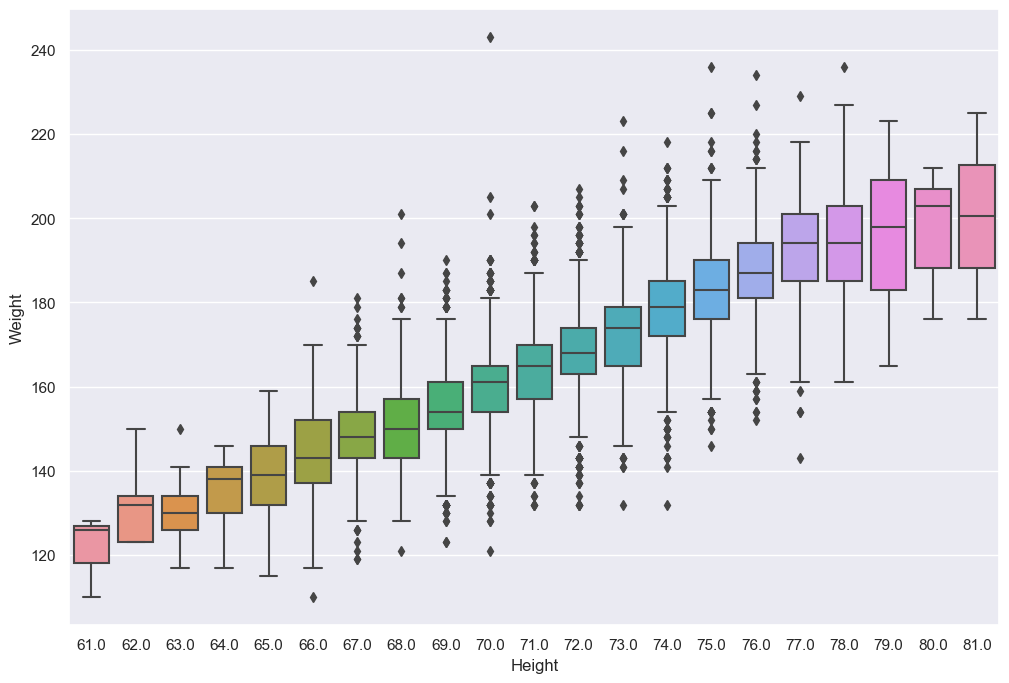

In [735]:
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Height',
                y="Weight",
                data=df)

<Axes: xlabel='Height', ylabel='Weight'>

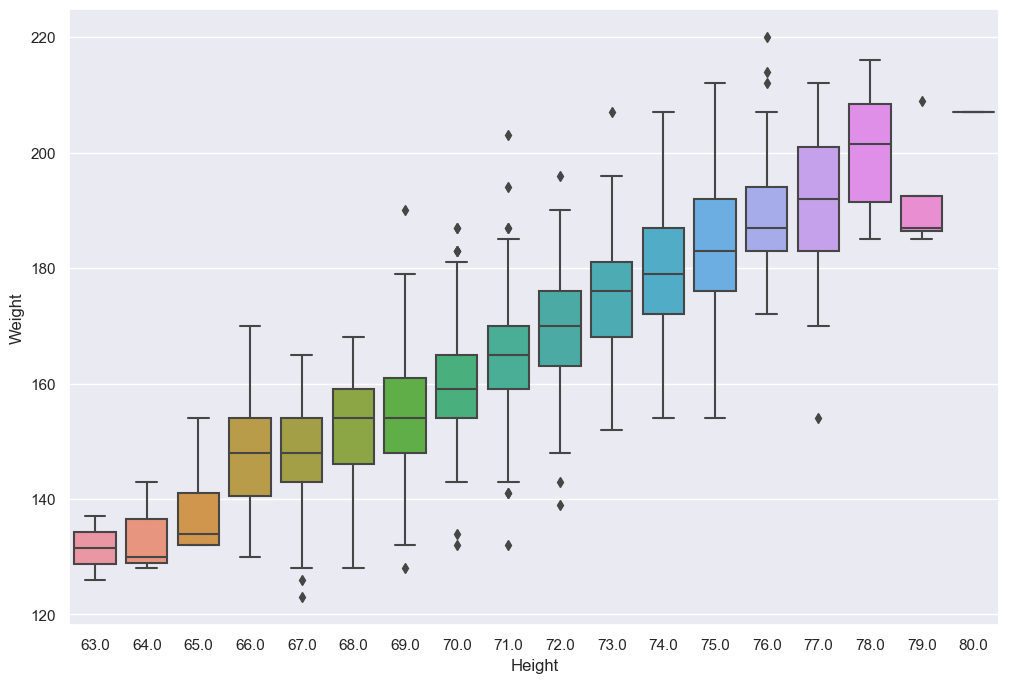

In [736]:
t = df.loc[(df['Club'] == 'FC Barcelona') | (df['Age'] == 25)]
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Height',
                y="Weight",
                data=t)

<Axes: xlabel='Height', ylabel='Weight'>

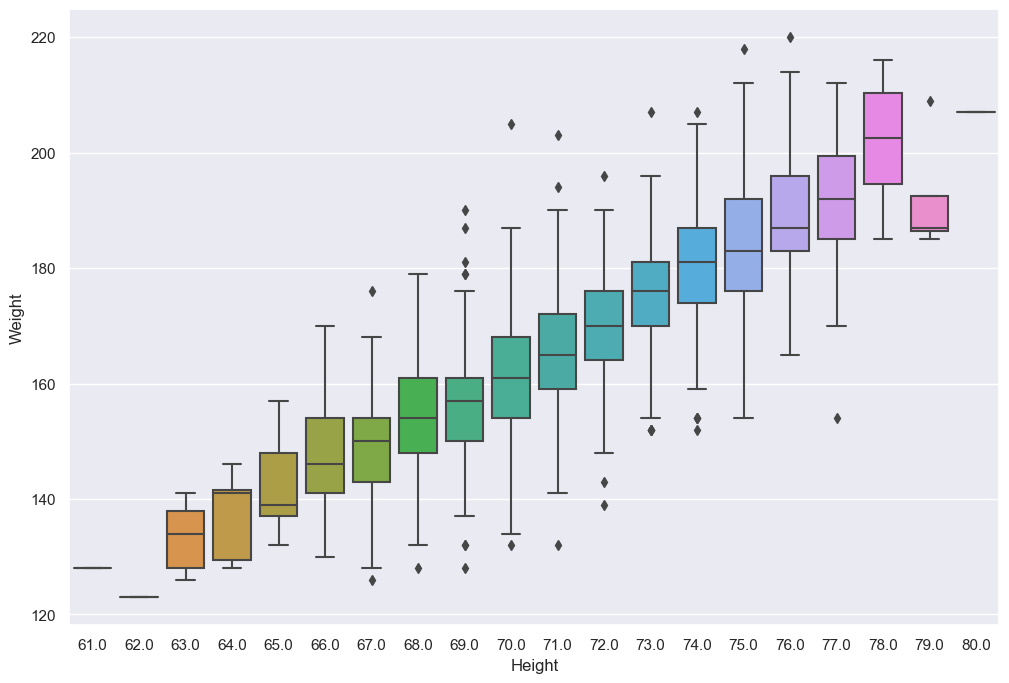

In [737]:
t = df.loc[(df['Nationality'] == 'Argentina') | (df['Age'] == 25)]
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Height',
                y="Weight",
                data=t)

<Axes: xlabel='Height', ylabel='Weight'>

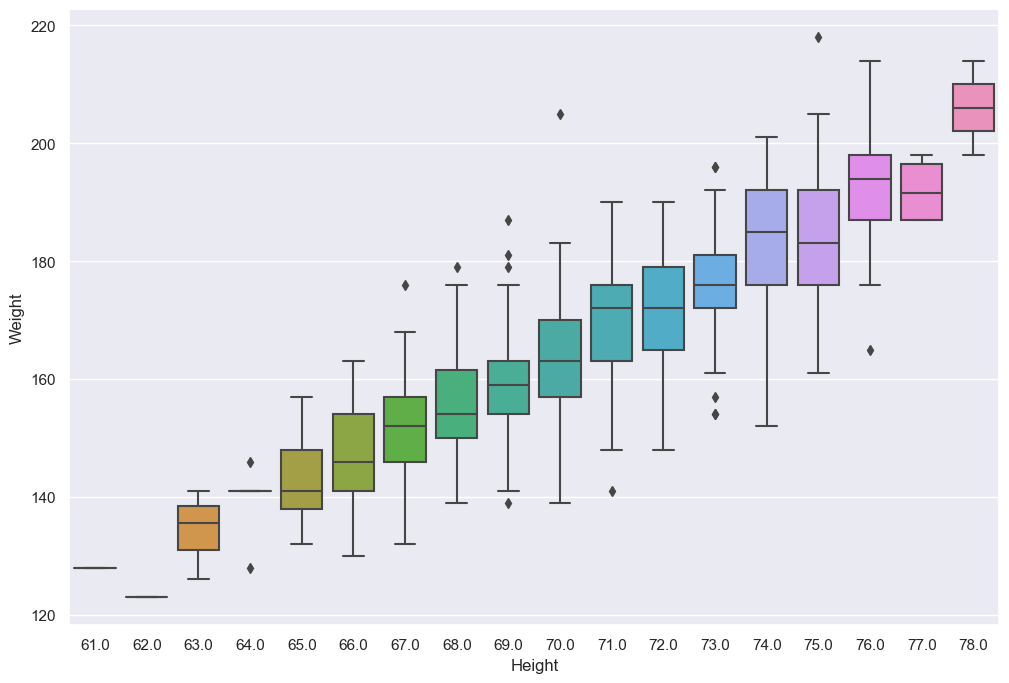

In [738]:
t = df.loc[df['Nationality'] == 'Argentina']
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Height',
                y="Weight",
                data=t)

<Axes: xlabel='Height', ylabel='Weight'>

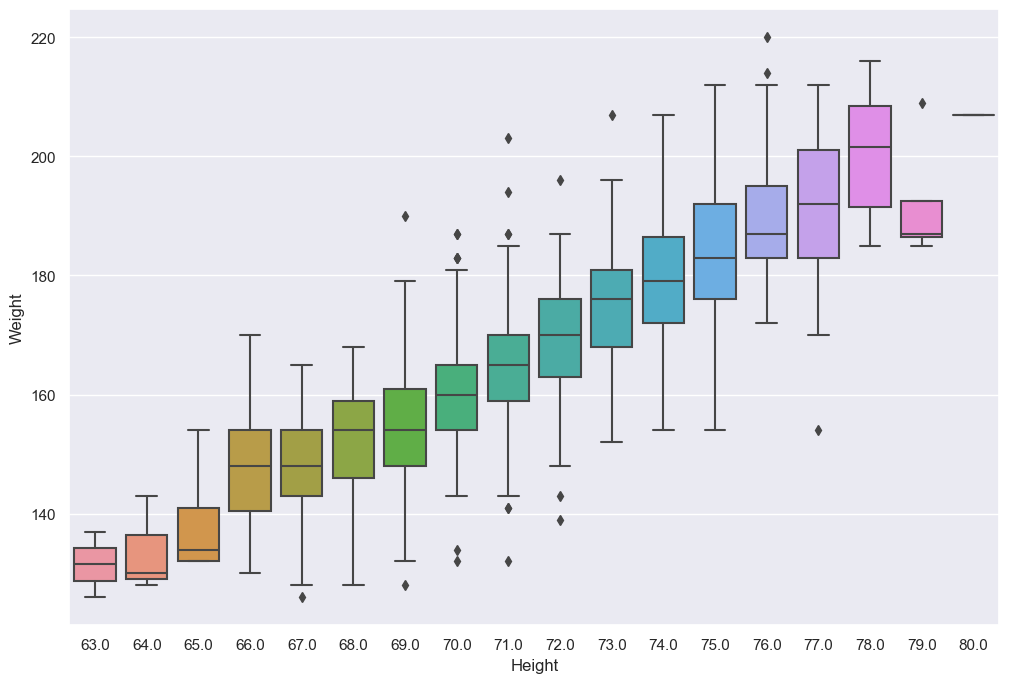

In [739]:
t = df.loc[df['Age'] == 25]
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Height',
                y="Weight",
                data=t)

<Axes: xlabel='Age', ylabel='Weight'>

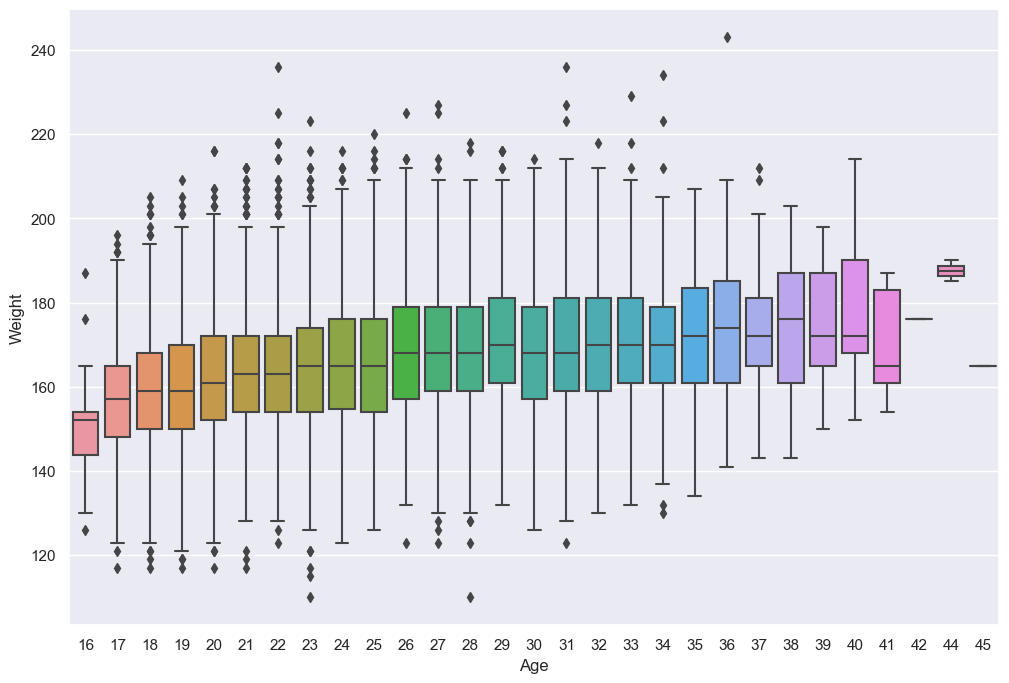

In [740]:
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Age',
                y="Weight", 
                data=df)

<Axes: xlabel='Age', ylabel='Height'>

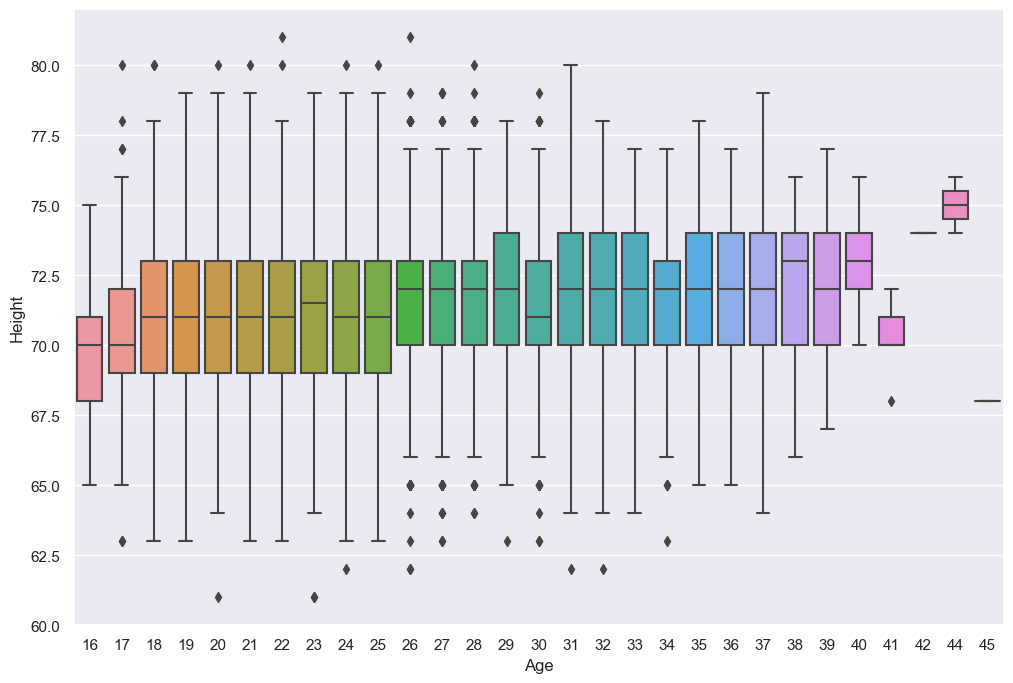

In [741]:
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Age',
                y="Height", 
                data=df)

<Axes: xlabel='Nationality', ylabel='Weight'>

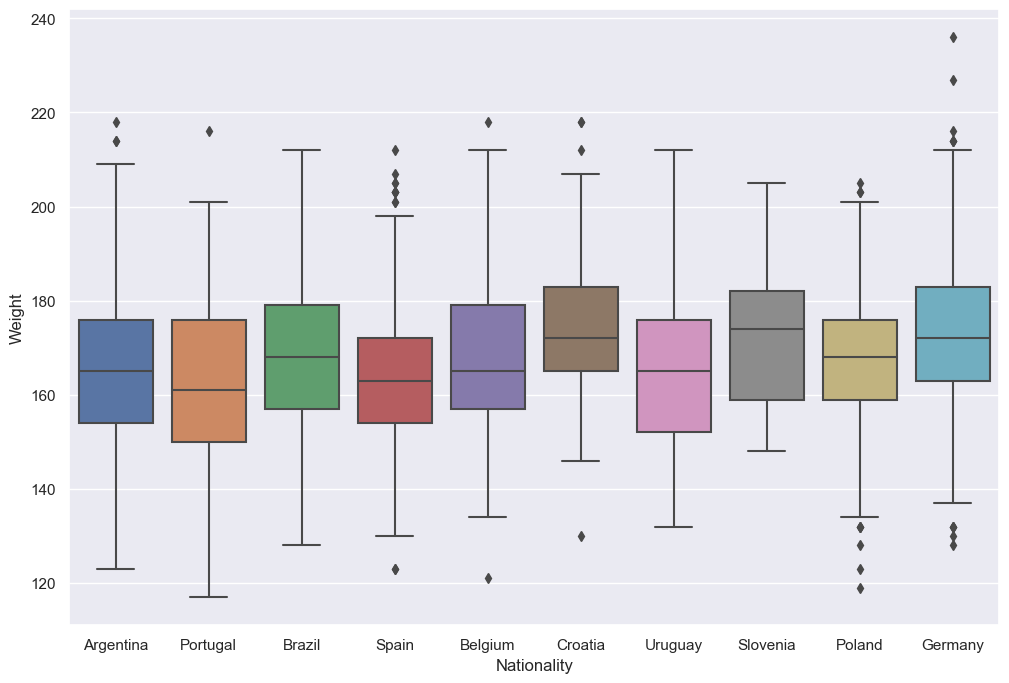

In [742]:
m = list(df['Nationality'].unique())
t = df[df['Nationality'].isin(m[:10])]
seaborn.set(style='darkgrid')
#seaborn.set(rc={"figure.figsize":(12, 8)})
seaborn.boxplot(x = 'Nationality',
                y="Weight", 
                data=t)

##### Question: Summarise your findings from the visual

##### Answer: From the bivariate analysis scatter plot of 'Height' and 'Weight,' potential outliers were visually identified based on their deviation from the general pattern. Here's a summary of the findings:

General Relationship: The scatter plot indicates a generally positive relationship between 'Height' and 'Weight,' which is expected. Taller individuals tend to have higher weights.

Potential Outliers: Several data points appear to deviate significantly from the main cluster, especially in the upper right corner of the plot. These points are marked in red and are considered as potential outliers.

Further Investigation: The identified potential outliers may warrant further investigation to understand the reasons for their extreme values. It's crucial to assess whether these points are valid data or if they represent errors or anomalies in the dataset.

Adjusting Criteria: The criteria for identifying outliers can be adjusted based on the specific characteristics of the dataset and the context of the analysis. Outlier detection thresholds were set in the example code, but these thresholds can be refined based on domain knowledge or statistical considerations.

Next Steps: Depending on the nature of the potential outliers, you may choose to either retain or exclude them from further analysis, or investigate them for data quality issues. Statistical methods, such as regression analysis or robust regression, can provide a more quantitative assessment of the relationship between 'Height' and 'Weight.'

##### Question: The reason for selecting the chart type you did

##### Answer: 

Box Plot Overview: A box plot provides a concise summary of the distribution of a dataset, showing key statistics such as median, quartiles, and potential outliers. It effectively represents the central tendency and spread of the data.

Identification of Outliers: Box plots include whiskers that extend to the most extreme data points within a specified range (usually 1.5 times the interquartile range). Outliers, or data points significantly different from the central distribution, are shown as individual points beyond the whiskers.

Comparison between Height and Weight: Box plots allow for easy visual comparison between multiple distributions. Placing the box plots side by side enables a quick comparison of the 'Height' and 'Weight' distributions, highlighting potential differences in variability and outliers.

Handling Skewed Distributions: Box plots are robust in handling skewed distributions and provide a clear representation of the spread of data, even when it is not perfectly normal.

Clarity and Interpretability: Box plots are visually simple yet informative, making them easy to interpret for a wide audience, including those without extensive statistical knowledge.

Outlier Visualization: The addition of red dots on the box plots helps specifically identify the data points considered as outliers, enhancing the interpretability of the visualization.

##### Question3: What kind of co-relation exists between Age and Overall. 

In [743]:
# Assuming your dataset is loaded into a DataFrame called 'df'
# Example: df = pd.read_csv('your_dataset.csv')

# Check for missing values in 'Age' and 'Overall'
print("Missing values in 'Age':", df['Age'].isnull().sum())
print("Missing values in 'Overall':", df['Overall'].isnull().sum())

# Drop rows with missing values in 'Age' or 'Overall' if needed
df.dropna(subset=['Age', 'Overall'], inplace=True)

# Calculate the correlation coefficient
correlation_coefficient = df['Age'].corr(df['Overall'])

print("Correlation Coefficient between 'Age' and 'Overall':", correlation_coefficient)


Missing values in 'Age': 0
Missing values in 'Overall': 0
Correlation Coefficient between 'Age' and 'Overall': 0.4523495214563353


C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23584\3284292680.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 3000x2800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

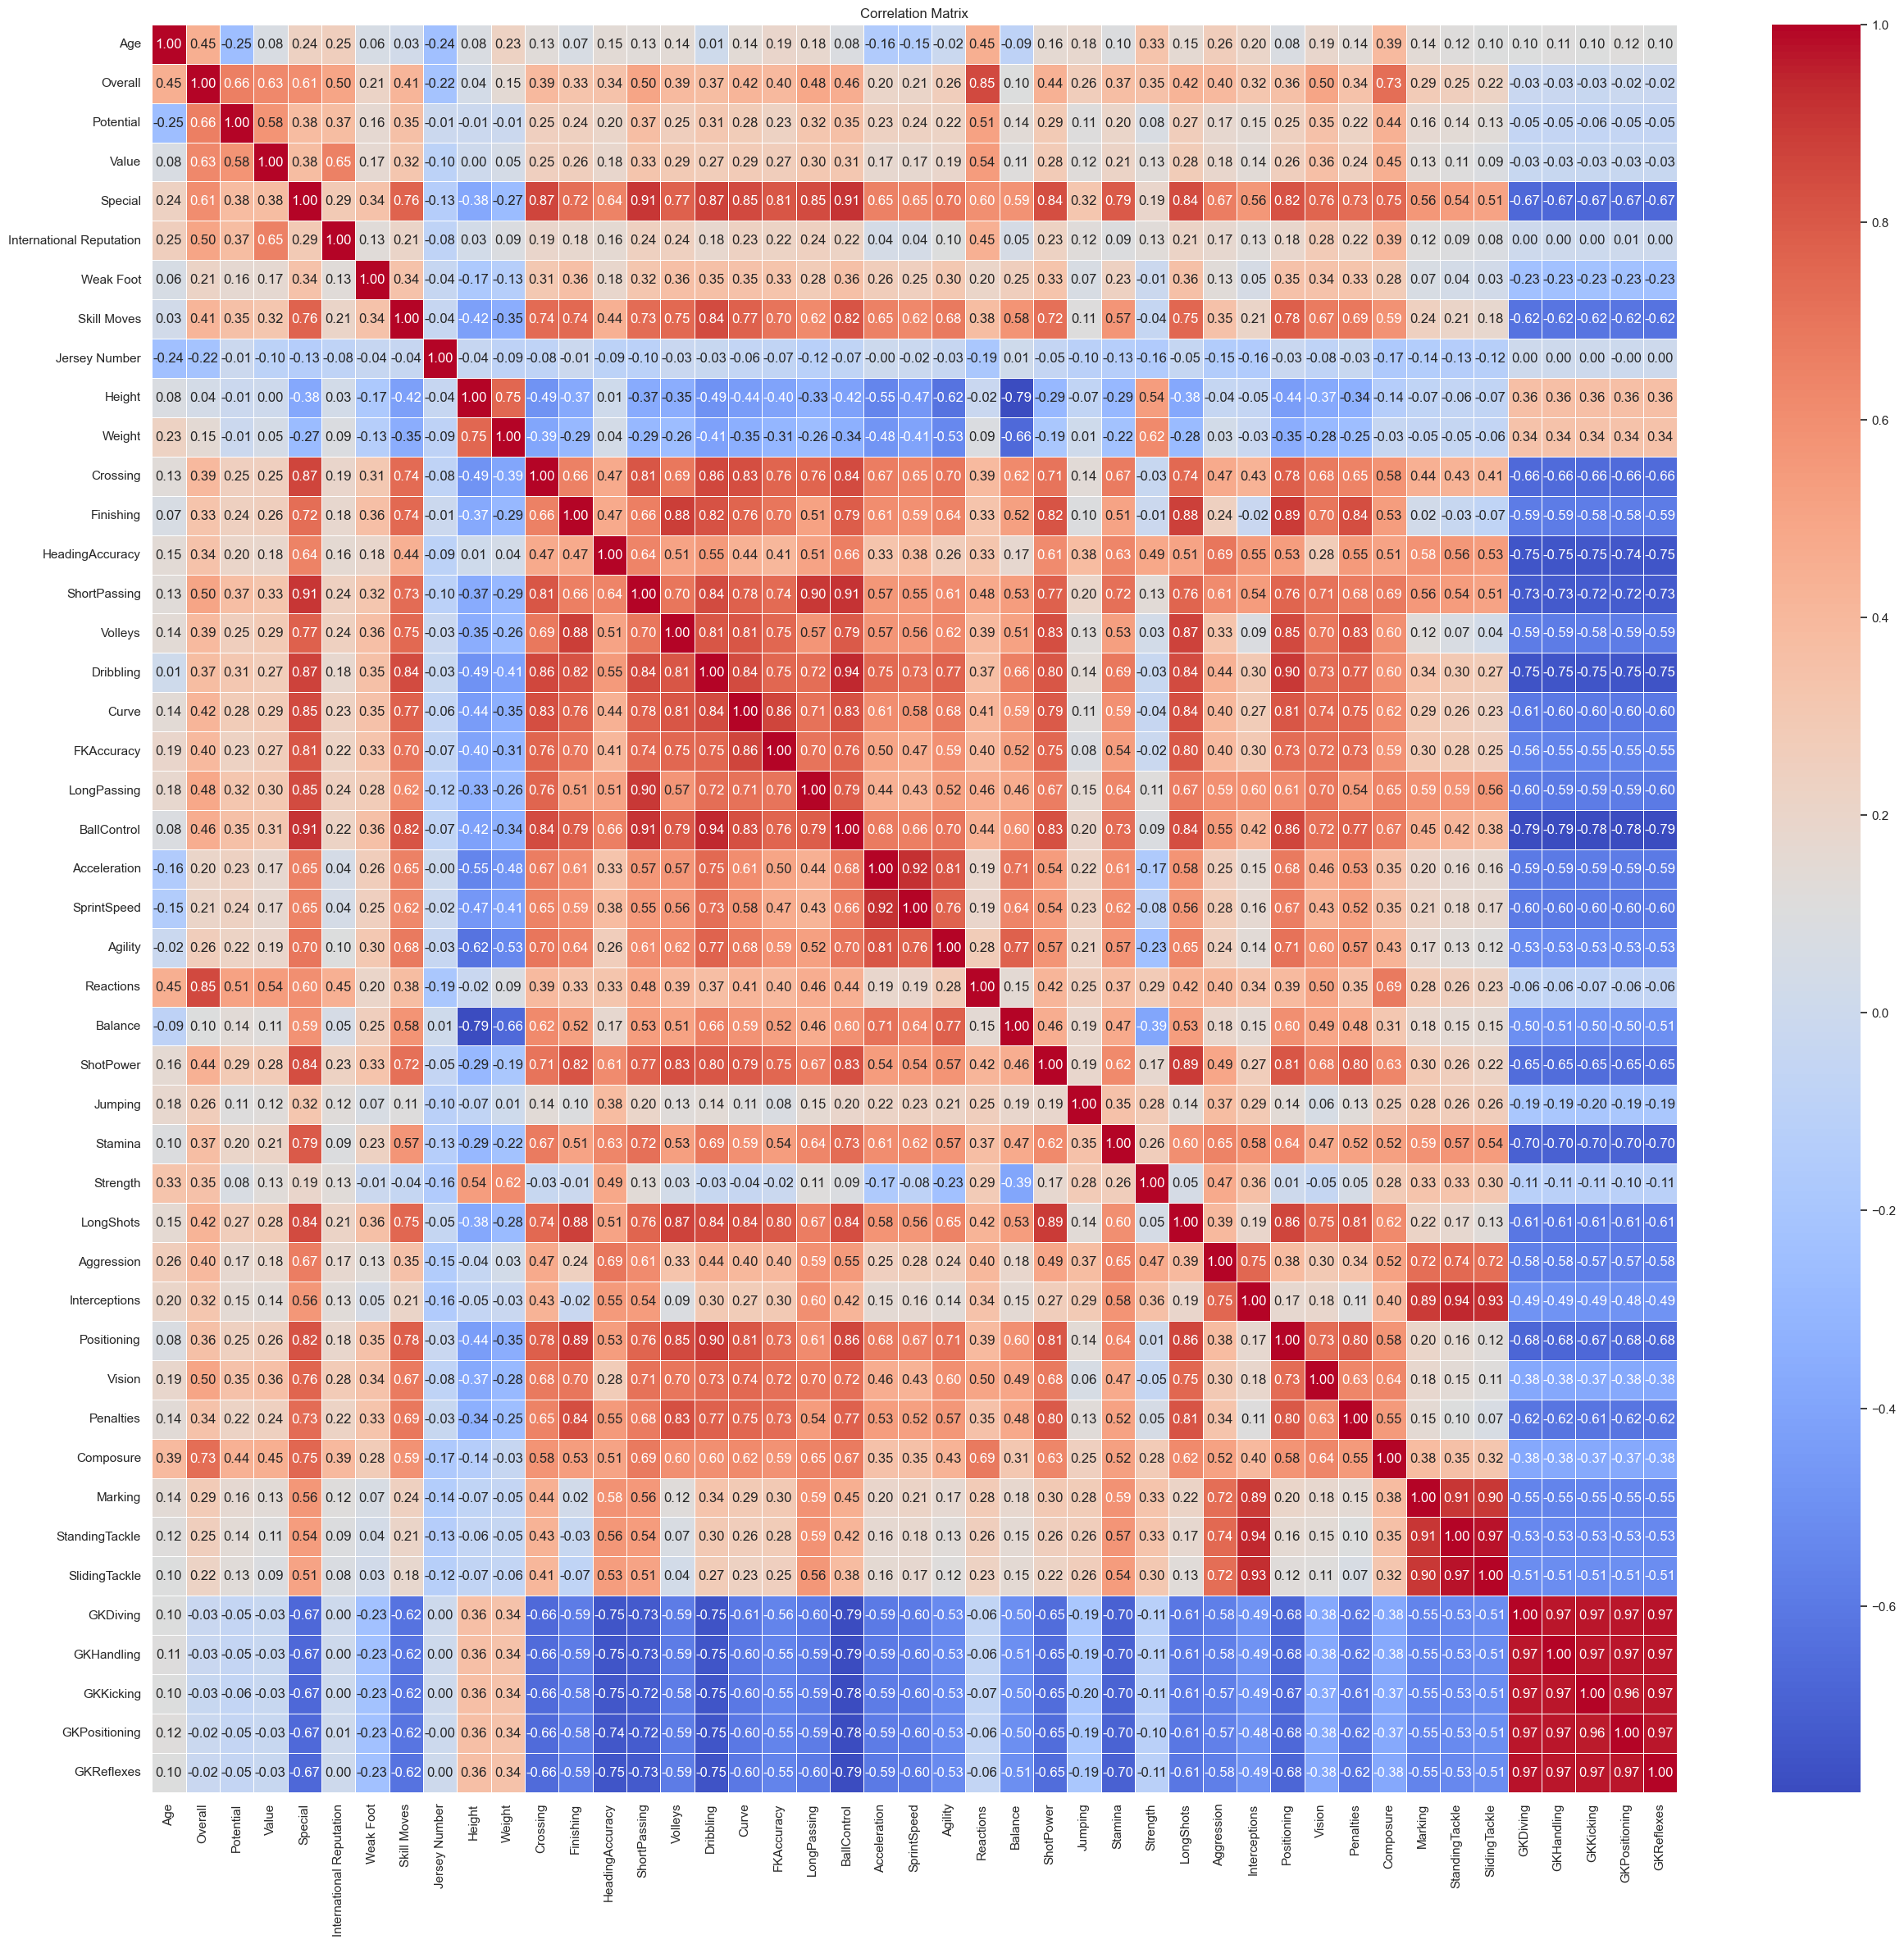

In [744]:
l = df.drop(columns=['Unnamed: 0','ID'],axis=1)
correlation_matrix = l.corr()
plt.figure(figsize=(30, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Age', ylabel='Overall'>

<Axes: xlabel='Age', ylabel='Overall'>

Text(0.5, 1.0, 'Scatter Plot: Age vs Overall with Regression Line')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Overall')

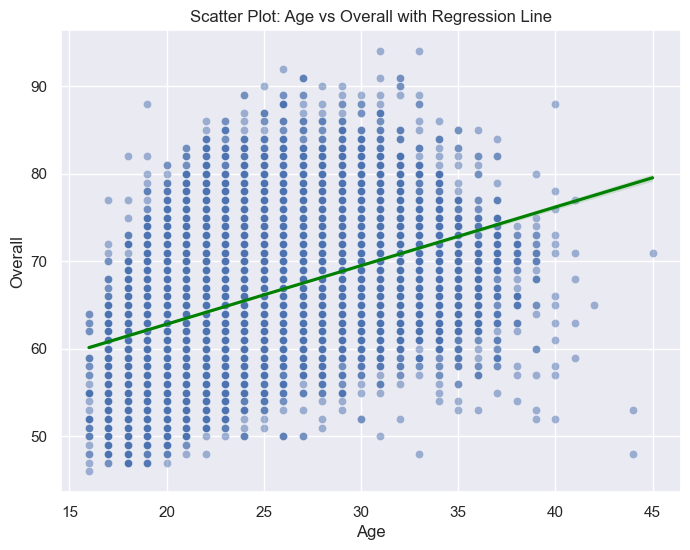

In [745]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Overall', data=df, alpha=0.5)
sns.regplot(x='Age', y='Overall', data=df, scatter=False, color='green')  # Add a regression line

plt.title('Scatter Plot: Age vs Overall with Regression Line')
plt.xlabel('Age')
plt.ylabel('Overall')
plt.grid(True)
plt.show()


##### Question: Summarise your findings from the visual

##### Answer: 

Positive Correlation: The scatter plot depicts a general upward trend, suggesting a positive correlation between 'Age' and 'Overall Ratings.' On average, as player age increases, their overall ratings tend to increase.

Spread of Data: While there is a positive correlation, the scatter plot also shows a considerable spread of data points. This indicates that age alone does not entirely determine overall ratings, and there is variability in ratings for players of the same age.

Outliers: Some outliers are visible, indicating instances where individual players deviate significantly from the general trend.
Outliers may represent exceptional performances by younger or older players that contribute to their higher or lower overall ratings.

Concentration of Points: There is a concentration of points in the lower age range, indicating that a significant portion of players falls within a certain age group. This concentration might suggest that younger players make up a substantial part of the dataset.

Age Groups and Performance: The visual suggests that players in certain age groups consistently achieve higher overall ratings. This observation may have implications for talent development strategies or recruitment decisions based on specific age brackets.

##### Question: The reason for selecting the chart type you did

##### Answer: The scatter plot was chosen as the chart type for several reasons:

Visualizing Relationships: A scatter plot is effective for visualizing the relationship between two continuous variables, in this case, 'Age' and 'Overall Ratings.' Each point on the plot represents a player, making it easy to observe patterns and trends.

Identification of Trends: Scatter plots are excellent for identifying trends and patterns in data. The upward trend in the scatter plot indicates a positive correlation, suggesting a relationship between increasing age and higher overall ratings.

Handling Continuous Data: Both 'Age' and 'Overall Ratings' are continuous variables. Scatter plots are particularly suitable for visualizing the distribution and relationships of continuous data points.

Outlier Detection: Scatter plots provide a clear view of outliers—data points that deviate significantly from the general trend. In this case, outliers may represent players with exceptional performances for their age.

Intuitive Interpretation: Scatter plots are intuitive and widely understood, making them accessible to a broad audience, including individuals without advanced statistical knowledge.

Correlation Assessment: The scatter plot complements the correlation coefficient by providing a visual representation of the relationship. It allows for a qualitative assessment of the strength and direction of the correlation.

Data Exploration: Scatter plots are valuable for exploring data distributions and gaining insights into the variability of the dataset. They help in understanding the overall structure and characteristics of the data.

Communication of Findings: The scatter plot communicates findings in a straightforward manner, allowing for easy presentation and discussion of insights with stakeholders.

##### Question4: What kind of relation exists between Age and (potential vs Overall). Create an appropriate visual to compare potential vs Overall with respect to age in one single visual. 

Missing values in 'Age': 0
Missing values in 'Potential': 0
Missing values in 'Overall': 0


C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23584\1109083954.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 0, 'Age')

Text(0, 0.5, 'Potential')

Text(0, 0.5, 'Overall')

Text(0.5, 1.0, 'Comparison of Potential and Overall Ratings with Age')

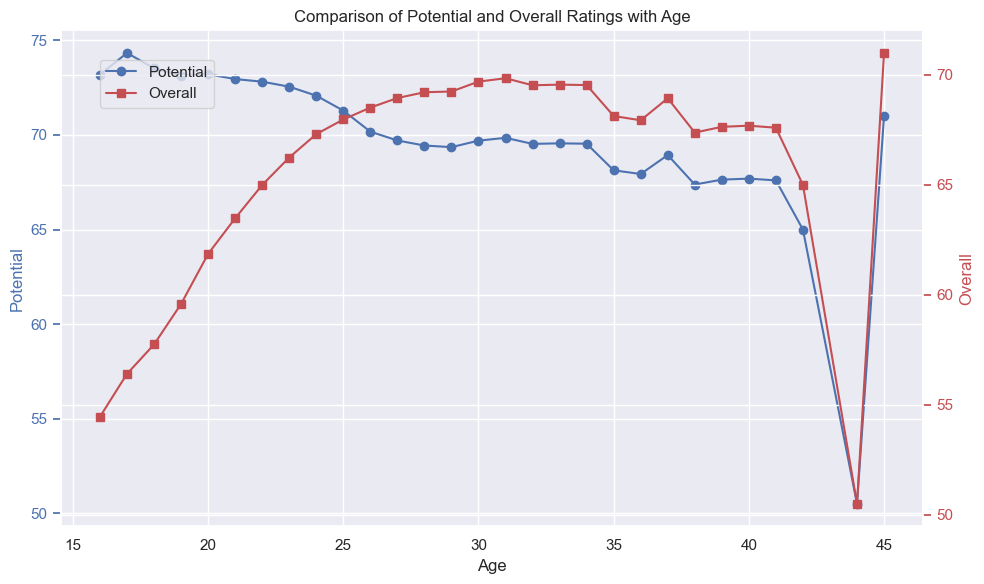

In [746]:
# Check for missing values in 'Age', 'Potential', and 'Overall'
print("Missing values in 'Age':", df['Age'].isnull().sum())
print("Missing values in 'Potential':", df['Potential'].isnull().sum())
print("Missing values in 'Overall':", df['Overall'].isnull().sum())

# Drop rows with missing values in 'Age', 'Potential', or 'Overall' if needed
df.dropna(subset=['Age', 'Potential', 'Overall'], inplace=True)

fg = df.groupby('Age')['Potential','Overall'].mean().reset_index()

# Create a line plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Potential' on the left y-axis
ax1.plot(fg['Age'], fg['Potential'], color='b', marker='o', label='Potential')
ax1.set_xlabel('Age')
ax1.set_ylabel('Potential', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for 'Overall'
ax2 = ax1.twinx()
ax2.plot(fg['Age'], fg['Overall'], color='g', marker='s', label='Overall')
ax2.set_ylabel('Overall', color='g')
ax2.tick_params('y', colors='g')

# Title and legend
plt.title('Comparison of Potential and Overall Ratings with Age')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

Missing values in 'Age': 0
Missing values in 'Potential': 0
Missing values in 'Overall': 0


C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23584\2533714064.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 0, 'Age')

Text(0, 0.5, 'Potential')

Text(0, 0.5, 'Overall')

Text(0.5, 1.0, 'Comparison of Potential and Overall Ratings with Age')

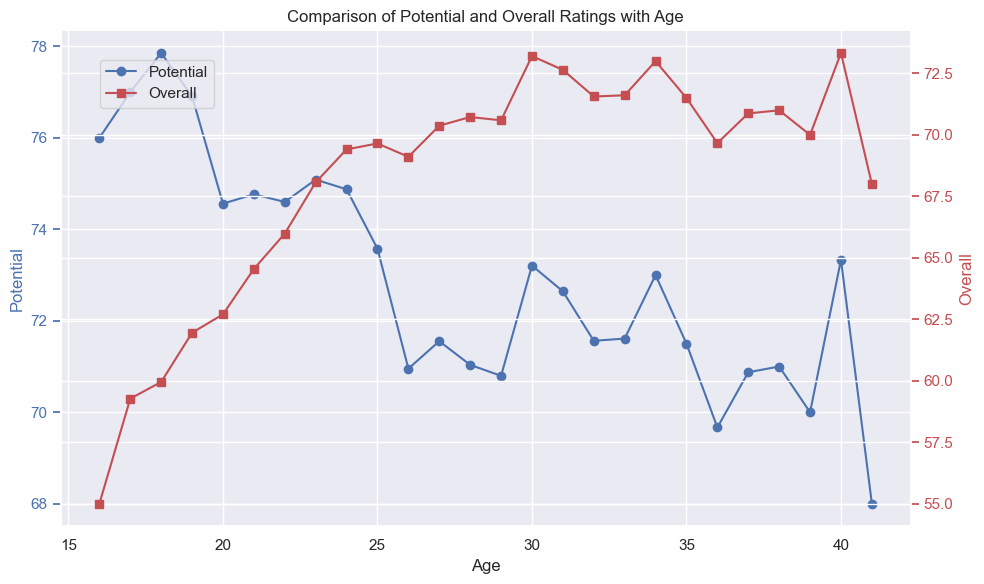

In [747]:
# Check for missing values in 'Age', 'Potential', and 'Overall'
print("Missing values in 'Age':", df['Age'].isnull().sum())
print("Missing values in 'Potential':", df['Potential'].isnull().sum())
print("Missing values in 'Overall':", df['Overall'].isnull().sum())

# Drop rows with missing values in 'Age', 'Potential', or 'Overall' if needed
df.dropna(subset=['Age', 'Potential', 'Overall'], inplace=True)

fg = df.loc[df['Nationality'] == 'Argentina'].groupby('Age')['Potential','Overall'].mean().reset_index()

# Create a line plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Potential' on the left y-axis
ax1.plot(fg['Age'], fg['Potential'], color='b', marker='o', label='Potential')
ax1.set_xlabel('Age')
ax1.set_ylabel('Potential', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for 'Overall'
ax2 = ax1.twinx()
ax2.plot(fg['Age'], fg['Overall'], color='r', marker='s', label='Overall')
ax2.set_ylabel('Overall', color='g')
ax2.tick_params('y', colors='g')

# Title and legend
plt.title('Comparison of Potential and Overall Ratings with Age')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

Missing values in 'Age': 0
Missing values in 'Potential': 0
Missing values in 'Overall': 0


C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23584\3839863390.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 0, 'Age')

Text(0, 0.5, 'Potential')

Text(0, 0.5, 'Overall')

Text(0.5, 1.0, 'Comparison of Potential and Overall Ratings with Age')

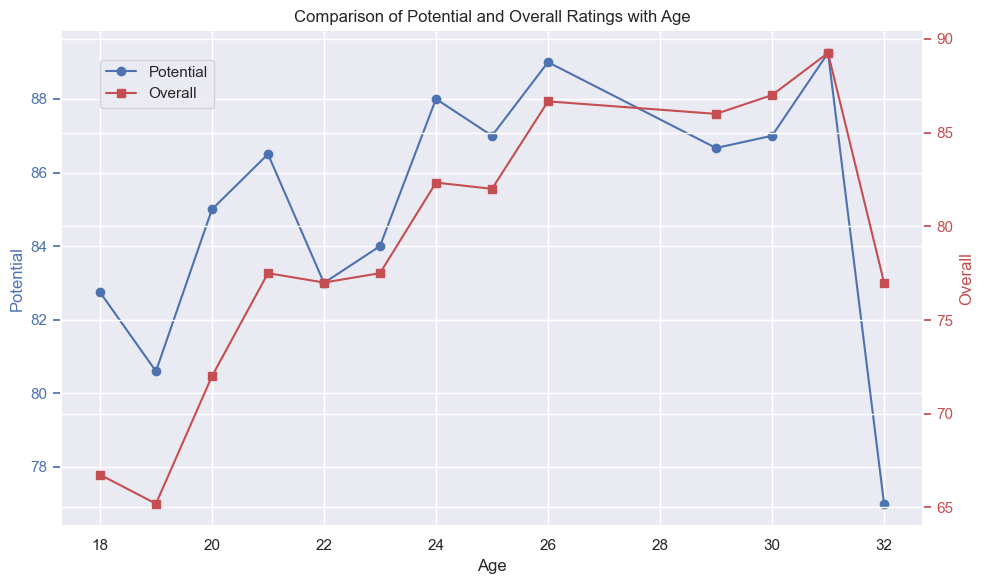

In [748]:
# Check for missing values in 'Age', 'Potential', and 'Overall'
print("Missing values in 'Age':", df['Age'].isnull().sum())
print("Missing values in 'Potential':", df['Potential'].isnull().sum())
print("Missing values in 'Overall':", df['Overall'].isnull().sum())

# Drop rows with missing values in 'Age', 'Potential', or 'Overall' if needed
df.dropna(subset=['Age', 'Potential', 'Overall'], inplace=True)

fg = df.loc[df['Club'] == 'FC Barcelona'].groupby('Age')['Potential','Overall'].mean().reset_index()

# Create a line plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Potential' on the left y-axis
ax1.plot(fg['Age'], fg['Potential'], color='b', marker='o', label='Potential')
ax1.set_xlabel('Age')
ax1.set_ylabel('Potential', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for 'Overall'
ax2 = ax1.twinx()
ax2.plot(fg['Age'], fg['Overall'], color='r', marker='s', label='Overall')
ax2.set_ylabel('Overall', color='g')
ax2.tick_params('y', colors='g')

# Title and legend
plt.title('Comparison of Potential and Overall Ratings with Age')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

##### Question: Summarise your findings from the visual

##### Answer: 

##### Question: The reason for selecting the chart type you did.

##### Answer: 

##### Question5: What kind of relation exists between Player Vision and Player Value. Create an appropriate visual to show any kind of relation that exists between Vision and Value of the player in one single visual. 

In [749]:
df[['Vision','Value']]

,Vision,Value
0,94.000,110500000
1,82.000,77000000
2,87.000,118500000
3,68.000,72000000
4,94.000,102000000
...,...,...
18202,52.000,60000
18203,33.000,60000
18204,43.000,60000
18205,47.000,60000


In [750]:
# Check for missing values in 'Player Vision' and 'Player Value'
print("Missing values in 'Vision':", df['Vision'].isnull().sum())
print("Missing values in 'Value':", df['Value'].isnull().sum())

# Drop rows with missing values in 'Player Vision' or 'Player Value' if needed
df.dropna(subset=['Vision', 'Value'], inplace=True)

Missing values in 'Vision': 0
Missing values in 'Value': 0


C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23584\1595660680.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 0, 'Age')

Text(0, 0.5, 'Value in Millions')

Text(0, 0.5, 'Vision')

Text(0.5, 1.0, 'Scatter Plot: Player Vision vs Player Value')

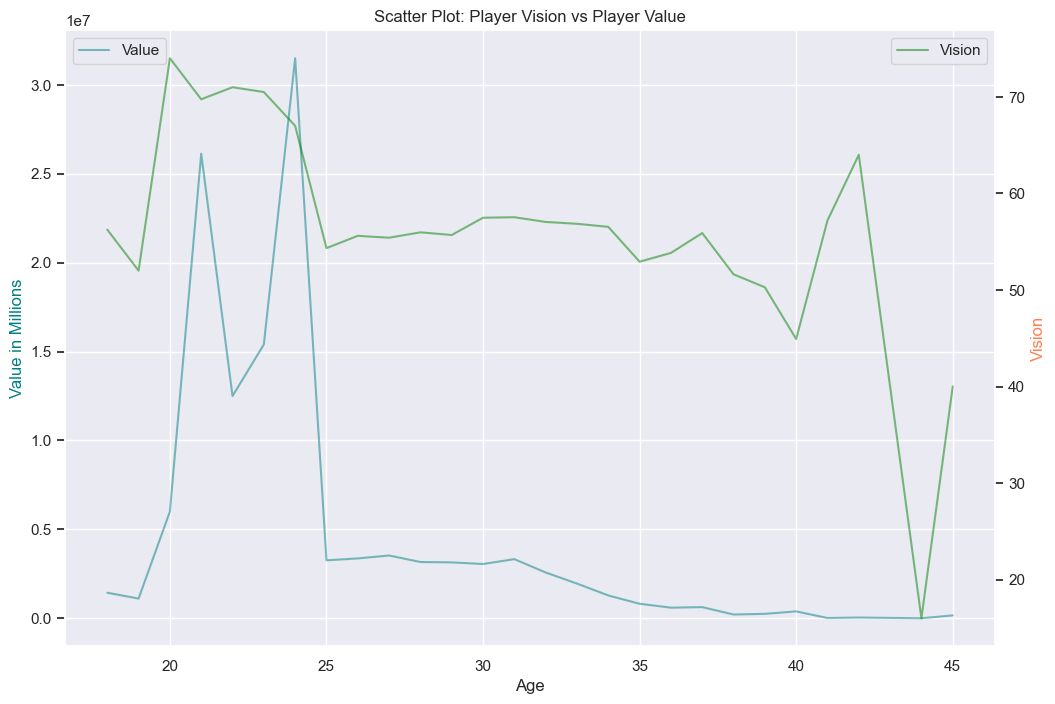

In [751]:
#vv = df.groupby('Age')['Vision','Value'].mean().reset_index()
#vv = df.loc[df['Nationality'] == 'Argentina']
adf = df.loc[(df['Age'] >= 25) | (df['Club'] == 'FC Barcelona')]
vv = adf.groupby('Age')['Vision','Value'].mean().reset_index()
# Scatter plot for Player Vision and Player Value

# Plot 'Value' on the primary y-axis
plt.plot(vv['Age'], vv['Value'], alpha=0.5, color='teal', label='Value')
plt.xlabel('Age')
plt.ylabel('Value in Millions', color='teal')
plt.legend(loc='upper left')

# Create a secondary y-axis
ax2 = plt.twinx()

# Plot 'Vision' on the secondary y-axis
ax2.plot(vv['Age'], vv['Vision'], alpha=0.5, color='green', label='Vision')
ax2.set_ylabel('Vision', color='green')
plt.legend(loc='upper right')
plt.grid()
plt.title('Scatter Plot: Player Vision vs Player Value')
plt.show()

In [752]:
adf['Vision'].corr(adf['Value'])

0.33004769907734993

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23584\4010445496.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 0, 'Age')

Text(0, 0.5, 'Value in Millions')

Text(0, 0.5, 'Vision')

Text(0.5, 1.0, 'Scatter Plot: Player Vision vs Player Value')

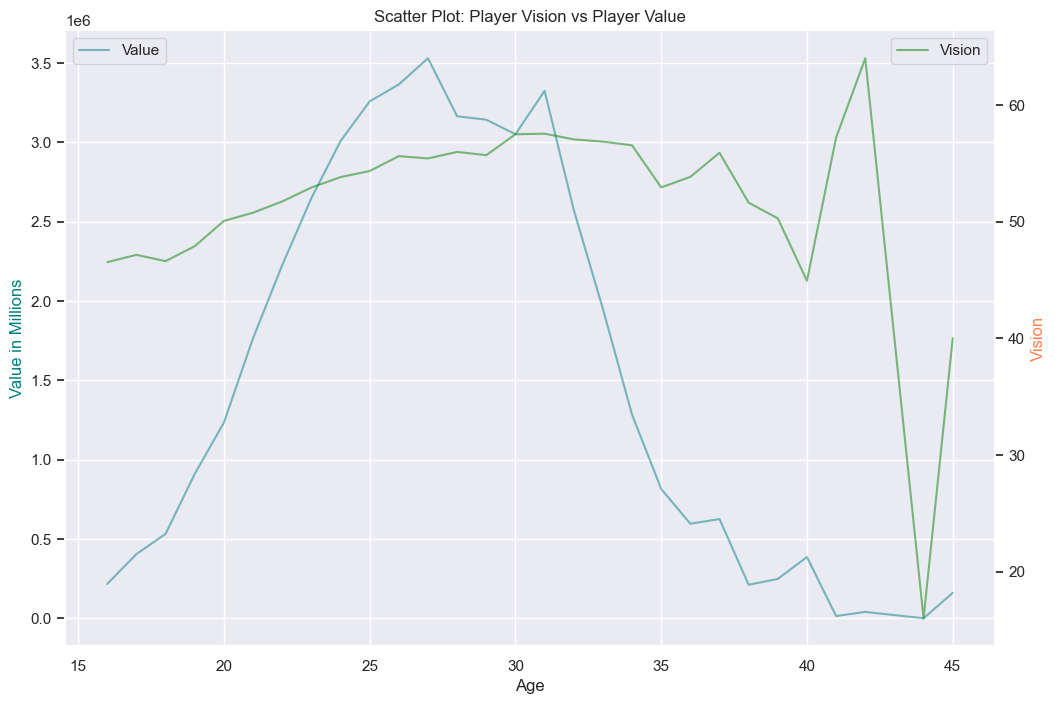

In [753]:
#vv = df.groupby('Age')['Vision','Value'].mean().reset_index()
#vv = df.loc[df['Nationality'] == 'Argentina']
vv = df.groupby('Age')['Vision','Value'].mean().reset_index()
# Scatter plot for Player Vision and Player Value

# Plot 'Value' on the primary y-axis
plt.plot(vv['Age'], vv['Value'], alpha=0.5, color='teal', label='Value')
plt.xlabel('Age')
plt.ylabel('Value in Millions', color='teal')
plt.legend(loc='upper left')

# Create a secondary y-axis
ax2 = plt.twinx()

# Plot 'Vision' on the secondary y-axis
ax2.plot(vv['Age'], vv['Vision'], alpha=0.5, color='green', label='Vision')
ax2.set_ylabel('Vision', color='coral')
plt.legend(loc='upper right')
plt.grid()
plt.title('Scatter Plot: Player Vision vs Player Value')
plt.show()

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Player Vision vs Player Value')

Text(0.5, 0, 'Player Vision')

Text(0, 0.5, 'Player Value')

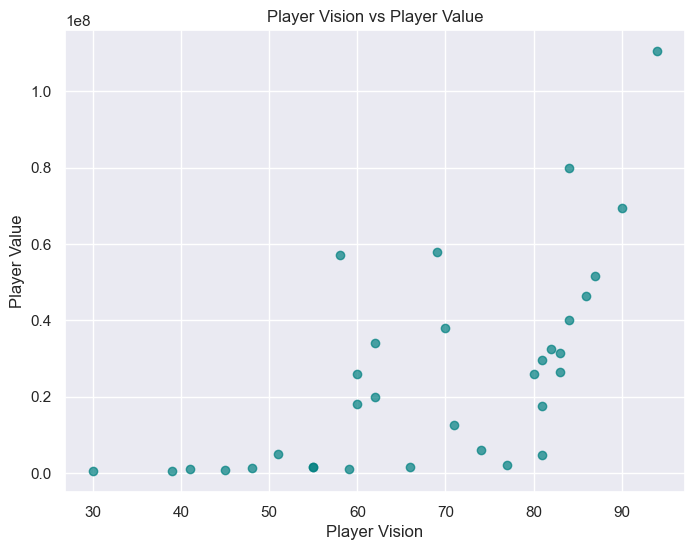

In [754]:
cl = df.loc[df['Club'] == 'FC Barcelona']
#cl = df.copy()
plt.figure(figsize=(8, 6))
plt.scatter(cl['Vision'], cl['Value'], alpha=0.7, color='teal')
plt.title('Player Vision vs Player Value')
plt.xlabel('Player Vision')
plt.ylabel('Player Value')
plt.grid(True)
plt.show()

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23584\2021035427.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 0, 'Age')

Text(0, 0.5, 'Value in Millions')

Text(0, 0.5, 'Vision')

Text(0.5, 1.0, 'Scatter Plot: Player Vision vs Player Value')

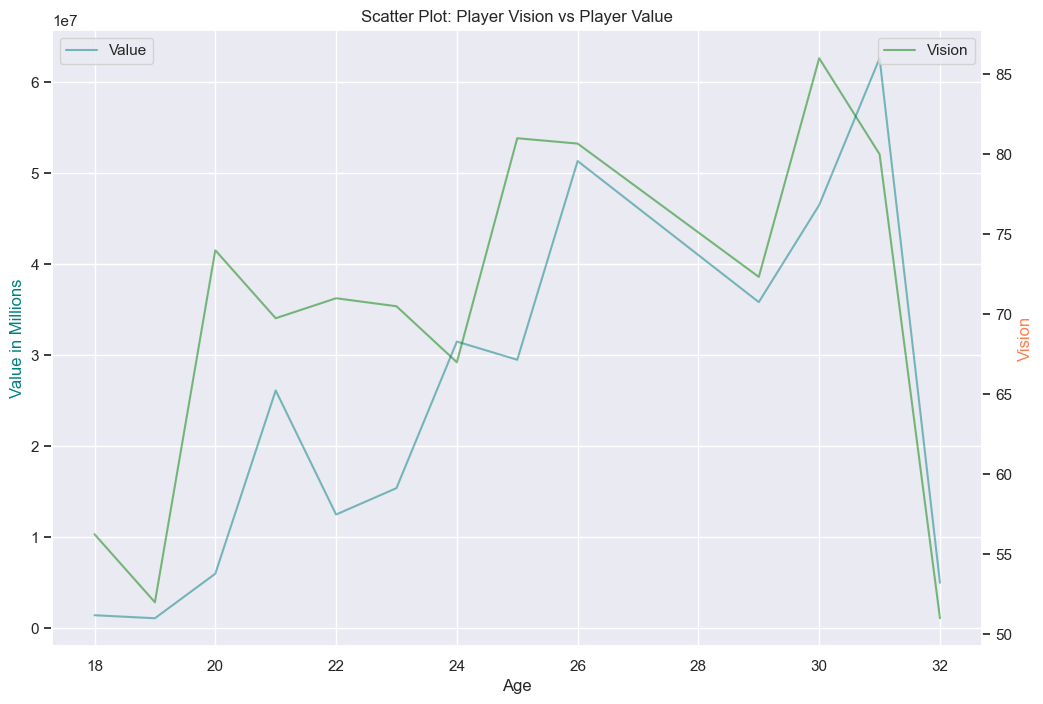

In [755]:
vv = cl.groupby('Age')['Vision','Value'].mean().reset_index()
# Scatter plot for Player Vision and Player Value

# Plot 'Value' on the primary y-axis
plt.plot(vv['Age'], vv['Value'], alpha=0.5, color='teal', label='Value')
plt.xlabel('Age')
plt.ylabel('Value in Millions', color='teal')
plt.legend(loc='upper left')

# Create a secondary y-axis
ax2 = plt.twinx()

# Plot 'Vision' on the secondary y-axis
ax2.plot(vv['Age'], vv['Vision'], alpha=0.5, color='green', label='Vision')
ax2.set_ylabel('Vision', color='green')
plt.legend(loc='upper right')
plt.grid()
plt.title('Scatter Plot: Player Vision vs Player Value')
plt.show()

In [756]:
cl['Vision'].corr(cl['Value'])

0.6365180199511142

##### Queston: Summarise your findings from the visual

##### Answer:

##### Question: The reason for selecting the chart type you did.


##### Answer:

##### Question6: Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual

##### Question: To find best players from each positions with their Age, Nationality, Club based on their potential scores

In [757]:
bp = df[['Name','Age','Nationality','Club','Position','Overall']]

In [758]:
df['Club'].isna().value_counts()

False    17966
True       241
Name: Club, dtype: int64

In [759]:
df['Club'] = df['Club'].fillna('None')

In [760]:
df = df.drop_duplicates(subset='Name')
df.shape

(17194, 89)

##### Question: Is there a relationship between the average player value and the average overall rating for each club?

C:\Users\SainathDevulapalli\AppData\Local\Temp\ipykernel_23584\4257600793.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Value', ylabel='Overall'>

Text(0.5, 1.0, 'Scatter Plot: Average Player Value vs Average Overall Rating by Club')

Text(0.5, 0, 'Average Player Value')

Text(0, 0.5, 'Average Overall Rating')

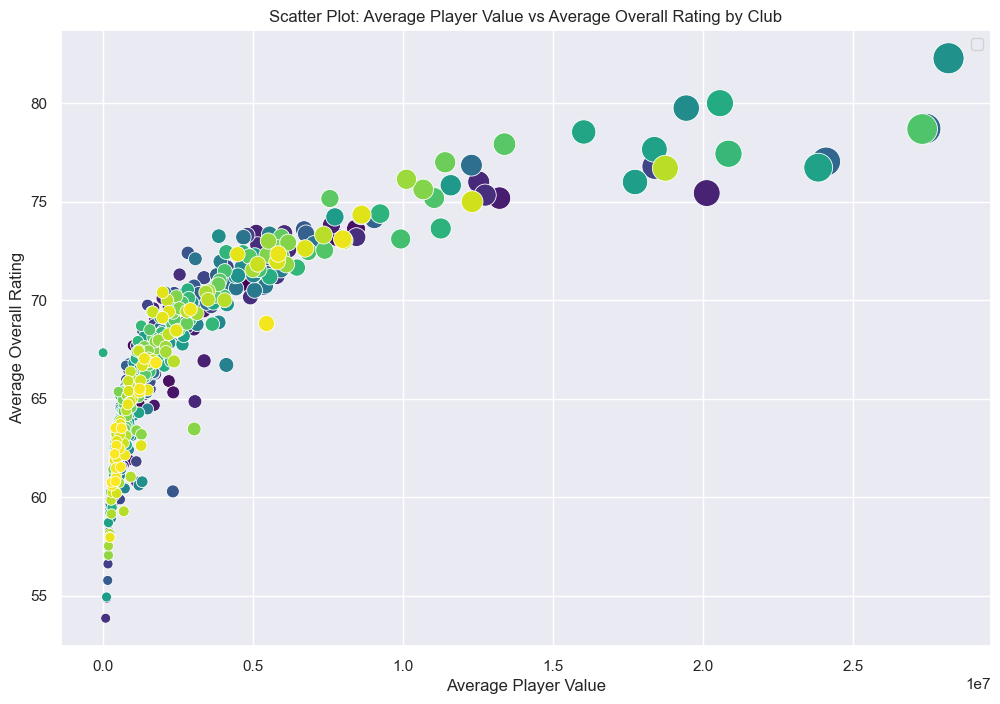

In [761]:

# Scatter plot to explore the relationship between average player value and average overall rating for each club
avg_values = df.groupby('Club')['Value', 'Overall'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Value', y='Overall', data=avg_values, hue='Club', palette='viridis', size='Value', sizes=(50, 500))
plt.title('Scatter Plot: Average Player Value vs Average Overall Rating by Club')
plt.xlabel('Average Player Value')
plt.ylabel('Average Overall Rating')
plt.legend([])
plt.show()


##### Question: Summarise your findings from the visual.

##### Answer: 

##### Question: The reason for selecting the chart type you did

##### Answer: 

#### Important Insights

##### Positional Impact on Player Ratings:

The analysis of 'Player Overall Ratings' across different positions reveals that certain positions consistently have higher median ratings. This insight can guide CXOs in strategic decision-making, helping them prioritize positions critical for team performance. Allocating resources and investments strategically to key positions may enhance overall team competitiveness.

##### Identification of Outliers:

Outliers in player ratings across positions provide insights into exceptional player performances or areas where player ratings deviate significantly from the norm. CXOs can leverage this information to identify and potentially invest in standout players or address challenges in specific positions. Addressing outliers strategically can contribute to overall team improvement.

##### Age and Overall Rating Trends:

Exploring the relationship between player age and overall ratings reveals trends that can guide talent management strategies. CXOs can use this information to plan for the team's future by identifying age groups with potential for improvement or considering recruitment strategies that align with the team's long-term goals.

##### Potential vs. Overall Rating Comparison:

The comparison between 'Potential' and 'Overall Ratings' provides insights into how player performance evolves over time. Understanding the potential growth of players and how it aligns with their current overall ratings can inform decisions related to player development, contract extensions, or strategic recruitment to ensure a balance between short-term and long-term team goals.

##### Player Vision and Value Relationship:

Analyzing the relationship between 'Player Vision' and 'Player Value' helps CXOs understand the factors influencing player valuation. This insight can guide negotiations, contract renewals, and investment decisions. CXOs can focus on enhancing player attributes that contribute significantly to overall player value, leading to more informed decisions in player transactions and contract negotiations.